In [4]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

df=pd.read_csv('../data/miRNA_matrix.csv')
df.loc[df['gender']=='male','gender']=0
df.loc[df['gender']=='female','gender']=1

print(df.shape)
df=df.dropna()
print(df.shape)
X_data = df.drop(columns=['label','gender','file_id']).values
y_data = df['gender'].values

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0)

(11481, 1884)
(11440, 1884)


In [5]:
import itertools
rna=df.drop(columns=['label','gender','file_id']).values
gender=df['gender'].values
diff=[]
for i in (range(rna.shape[1])):
    kms = KMeans(n_clusters=2, random_state=123).fit(rna[:,[i]])
    a=(abs(kms.labels_ - gender).sum())
    b=(abs(1-kms.labels_- gender).sum())
    if (a>b):
        a=b
    diff.append((i,a))

In [11]:
diff.sort(key=lambda x: x[1])
arr=np.asarray(diff)
arr[:,0][0:300]
la=np.zeros(rna.shape[0])
print(la.shape)
print(gender.sum())
count=0

g=0
print(gender[gender==g].shape)
f = (arr[:,0][0:100])
mydata=rna[y_data==g,:]
kms = KMeans(n_clusters=2, random_state=123).fit(mydata[:,f])
a=(abs(kms.labels_ - gender[gender==g]).sum())
b=(abs(1-kms.labels_- gender[gender==g]).sum())
print(gender[gender==g])
print(kms.labels_.sum())
#print(1-kms.labels_)
cluster=kms.labels_
if (a>b):
    a=b
    cluster=(1-kms.labels_)
print(cluster, a)
count=count+1


(11440,)
5989
(5451,)
[0 0 0 ... 0 0 0]
1318
[0 0 0 ... 0 0 1] 1318


In [14]:
t=la

x=X_data[y_data==1,:]
x[:,f]

array([[     1,  84662,  16427, ...,      0,      0,     80],
       [     0, 169083,    217, ...,      0,      0,     98],
       [     0, 255166,  55210, ...,      0,      0,     35],
       ...,
       [     1, 244939,    842, ...,      0,      0,    129],
       [     0, 400950,    304, ...,      0,      0,     29],
       [     0, 305158,    559, ...,      0,      0,    173]])

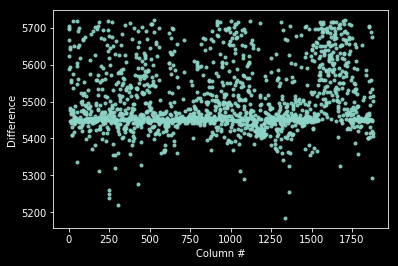

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
plt.scatter(arr[:,0],arr[:,1],marker='.',alpha='0.9')
plt.ylabel('Difference')
plt.xlabel('Column #')
plt.show()

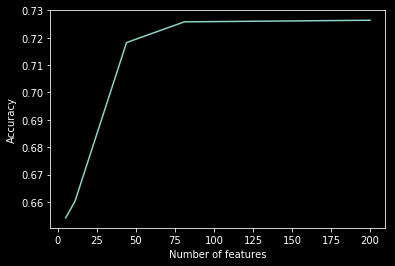

In [51]:
import numpy as np
a=[(200,0.7264055944055944),(81,0.7258158508158508),(44,0.7182400932400932),(11,0.6602564102564102),(5,0.6541375291375291)]
a=np.asarray(a)
plt.plot(a[:,0],a[:,1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.show()